# DVS Individual Project
Adriane Mikko A. Amorado
<br>
Data source: `~/mnt/data/public/sushipref/sushi3-2016`
<br>
Credits to: `Toshihiro Kamishima, his colleagues, and their employers`

## I. Exploratory data analysis
The data was a survey conducted accross japan about people's preference of sushi.

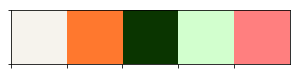

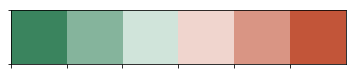

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sushi = ['#f6f3ed', '#ff782e', '#0a3500', '#d2ffce', '#ff7f7f']
sns.palplot(sushi)
cmap = sns.diverging_palette(145, 20, n=6)
sns.palplot(cmap)

### A. Read the files

#### 1. This file contains item `set B` which is 100 sushi with their corresponding attributes.
The table was joined with the corresponding `minor_group` names.
* `freq_eat` how frequently the user eats the <b>SUSHI</b>, range[0-3] 3:being the most frequent
* `price_norm` normalized price
* `freq_sold` how frequently the SUSHI is sold in sushi shop, range[0-1] 1:being the most frequent

In [2]:
min_grp = pd.Series({0: 'aomono (blue-skinned fish)',
                     1: 'akami (red meat fish)',
                     2: 'shiromi (white-meat fish)',
                     3: 'tare (something like baste; for eel or sea eel)',
                     4: 'clam or shell',
                     5: 'squid or octopus',
                     6: 'shrimp or crab',
                     7: 'roe',
                     8: 'other seafood',
                     9: 'egg',
                     10: 'meat other than fish',
                     11: 'vegetables'},
                    name='minor_group')

itm = pd.read_csv('/mnt/data/public/sushipref/sushi3-2016/sushi3.idata',
                  names=['item_id', 'item_name', 'item_style', 'maj_grp_code',
                         'min_grp_code', 'oiliness', 'freq_eat', 'price_norm',
                         'freq_sold'], index_col=[0], sep='\t')

itm_b = itm.join(min_grp, on='min_grp_code')
it_nam_b = itm['item_name'].to_numpy()
item_b_details = itm_b[['item_name', 'minor_group', 'oiliness',
                        'freq_eat', 'price_norm', 'freq_sold']]
item_b_details

,item_name,minor_group,oiliness,freq_eat,price_norm,freq_sold
item_id,,,,,,
0,ebi,shrimp or crab,2.728978,2.138422,1.838420,0.84
1,anago,tare (something like baste; for eel or sea eel),0.926384,1.990228,1.992459,0.88
2,maguro,akami (red meat fish),1.769559,2.348506,1.874725,0.88
3,ika,squid or octopus,2.688401,2.043240,1.515152,0.92
4,uni,other seafood,0.813043,1.643478,3.287282,0.88
...,...,...,...,...,...,...
95,karei,shiromi (white-meat fish),2.600000,1.094737,1.000000,0.04
96,hiramasa,aomono (blue-skinned fish),1.970588,1.000000,1.000000,0.04
97,namako,other seafood,1.936709,0.443038,1.500000,0.04


#### 2. This file contains the user (customer) data
The table was pruned to `gender_code` and `age_code`, as we are not exploring the geographical info on this EDA yet. The table was joined with the corresponding `gender` and `age_group` names

In [3]:
usr = pd.read_csv('/mnt/data/public/sushipref/sushi3-2016/sushi3.udata',
                  sep='\t', names=['user_id', 'gender_code', 'age_code'],
                  usecols=[0, 1, 2])

gender = pd.Series({0: 'male', 1: 'female'}, name='gender')
usr = usr.join(gender, on='gender_code')

age_group = pd.Series({0: '15-19', 1: '20-29', 2: '30-39',
                       3: '40-49', 4: '50-59', 5: '60+'},
                      name='age_group')
usr = usr.join(age_group, on='age_code')

user_details = usr[['user_id', 'gender', 'age_code', 'age_group']]
user_details

,user_id,gender,age_code,age_group
0,6371,male,2,30-39
1,10007,female,1,20-29
2,1777,female,2,30-39
3,3613,male,4,50-59
4,8081,female,1,20-29
...,...,...,...,...
4995,5265,male,4,50-59
4996,8756,female,3,40-49
4997,4623,male,1,20-29
4998,10128,female,2,30-39


#### 3. This file contains the top 5 picks per user in set B
The table contains `user_id` as rows and `item_name` as columns. The values are using a five-point-scale:
* 0: the most disliked<br>
* 4: the most preferred<br>
* -: not rated

 
The table is then unpivoted to provide a better usability

In [4]:
b_scr = pd.read_csv('/mnt/data/public/sushipref/sushi3-2016/'
                    'sushi3b.5000.10.score',
                    sep=' ',
                    names=it_nam_b)
b_prefs = (usr[['user_id']].join(b_scr)
                           .melt(id_vars='user_id', var_name='item_name',
                                 value_name='preferrence')
                           .query('preferrence >= 0'))
b_prefs

,user_id,item_name,preferrence
3,3613,ebi,4
5,1462,ebi,4
8,6861,ebi,4
10,9077,ebi,0
15,5281,ebi,3
...,...,...,...
499711,9177,kaki,2
499721,1779,kaki,0
499843,8590,kaki,1
499849,6799,kaki,3


#### 4. This file contains the ranking of `set A` items as preferred by the users (customers)
The table uses the corresponding `item_names` of `set A` (10 items) ranked by the users according to their preferences, range[1-10] 1:being the highest.

In [5]:
a_dict = {0: 'ebi\n(shrimp)',
          1: 'anago\n(sea eel)',
          2: 'maguro\n(tuna)',
          3: 'ika\n(squid)',
          4: 'uni\n(sea urchin)',
          5: 'ikura\n(salmon roe)',
          6: 'tamago\n(egg)',
          7: 'toro\n(fatty tuna)',
          8: 'tekka maki\n(tuna roll)',
          9: 'kappa maki\n(cucumber roll)'}
it_nam_a = pd.Series(a_dict, name='item_name')

a_ord = (pd.read_csv('/mnt/data/public/sushipref/sushi3-2016/'
                    'sushi3a.5000.10.order',
                    sep=' ',
                    skiprows=1,
                    names=[*range(1, 11)],
                    usecols=[*range(2, 12)])
           .reset_index()
           .melt(id_vars='index', var_name='rank', value_name='item_id')
           .join(it_nam_a, on='item_id'))
a_ord['user_code'] = a_ord['index']
a_ranked = a_ord[['user_code', 'item_name', 'rank']]
a_ranked

,user_code,item_name,rank
0,0,ikura\n(salmon roe),1
1,1,ebi\n(shrimp),1
2,2,toro\n(fatty tuna),1
3,3,uni\n(sea urchin),1
4,4,tekka maki\n(tuna roll),1
...,...,...,...
49995,4995,kappa maki\n(cucumber roll),10
49996,4996,uni\n(sea urchin),10
49997,4997,kappa maki\n(cucumber roll),10
49998,4998,uni\n(sea urchin),10


### B. Explore the data

#### 1. Is there any correlation between the key sushi characteristics and how they sell?
A good initial check is running a scatter matrix/pair plot to immediately see the correlations between numeric variables. The variables selected were:
* Oiliness, or the richness/heavyness of the flavor. *"Generally speaking, the eastern Japanese prefers more oily and more heavily seasoned food than the western Japanese."*
* The normalized price
* How frequently the user eats the SUSHI, range[0-3] 3:frequently eat
* How frequently the SUSHI is sold in sushi shop, range[0-1] 1:the most frequently
 
There seems no strong correlations in the columns selected. Except perhaps, the price and frequency sold/bought. We'll see in the following plots.

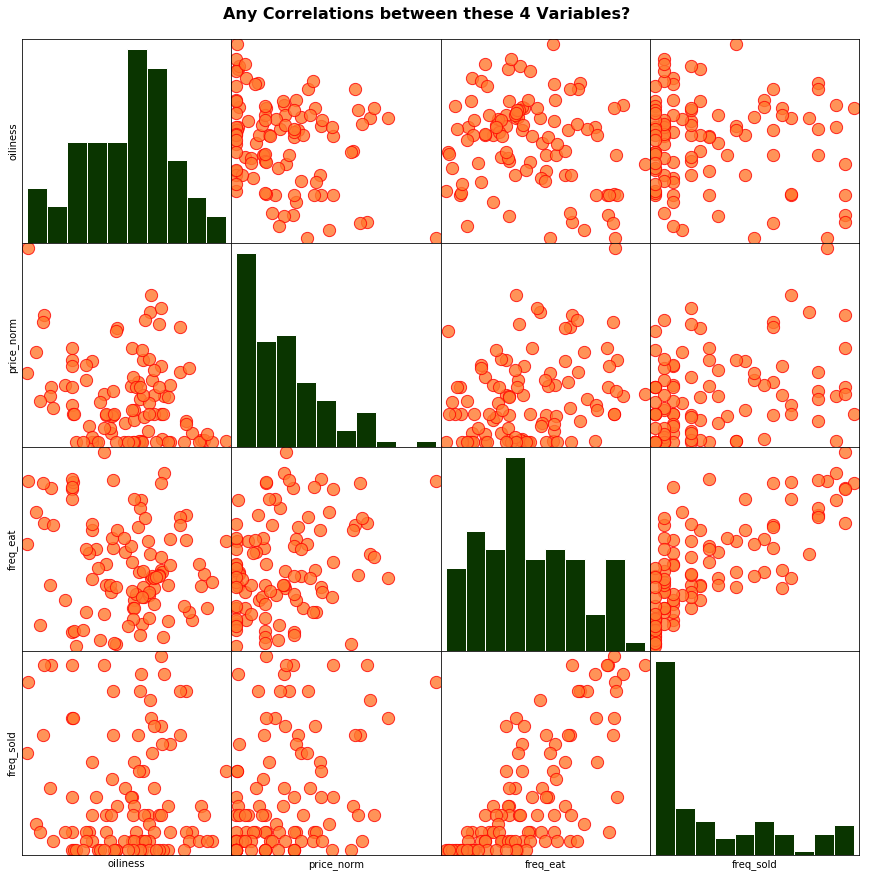

In [6]:
ax0 = pd.plotting.scatter_matrix(
    item_b_details[['oiliness', 'price_norm', 'freq_eat', 'freq_sold']],
    figsize=(15,15), alpha=.8, s=600, color='#ff782e', edgecolor='r',
    hist_kwds={'color':['#0a3500'], 'edgecolor':'w'})

plt.suptitle('Any Correlations between these 4 Variables?', fontsize=16,
             fontweight='black', y=.91)

for i in range(4):
    for j in range(4):
        ax0[j, i].set_xticks([])
        ax0[j, i].set_yticks([])
        
plt.show();

#### 2. Is there a correlation with what the user eats and the price? 
Unsurprisingly, the density of the plot is around (1, 1) which means the customer would normally buy at average prices . There is quite a skew towards a few kinds of sushi with twice the price being bought quite frequently as well. Interestingly, there were a few kinds at avery high price bought more frequently than normal, centered just past (3, 1.5).<br>From the side of the shops, similarly, the distribution of frequency is centered around the average price.

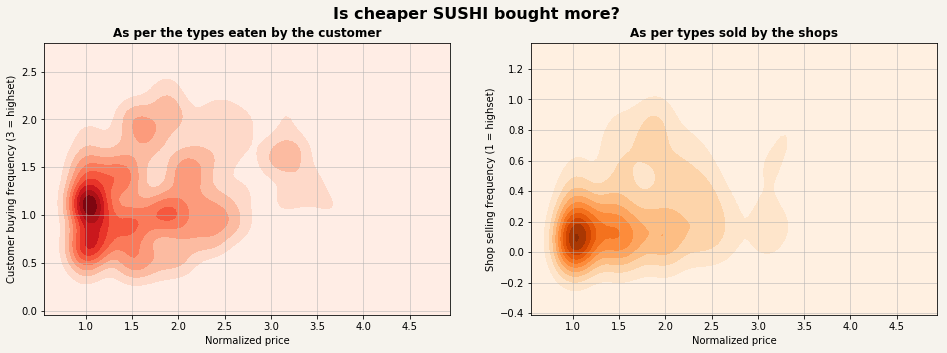

In [7]:
fig1, ax1 = plt.subplots(ncols=2, figsize=(16, 5), facecolor='#f6f3ed')
fig1.suptitle('Is cheaper SUSHI bought more?',
              fontsize=16, fontweight='black')

sns.kdeplot(item_b_details['price_norm'], item_b_details['freq_eat'],
            cmap='Reds', shade=True, bw=.15, ax=ax1[0])
ax1[0].set_title('As per the types eaten by the customer', fontweight='bold')
ax1[0].set_xlabel('Normalized price')
ax1[0].set_ylabel('Customer buying frequency (3 = highset)')
ax1[0].grid(True, axis='both', which='both', linewidth=.5)

sns.kdeplot(item_b_details['price_norm'], item_b_details['freq_sold'],
            cmap='Oranges', shade=True, bw=.15, ax=ax1[1])
ax1[1].set_title('As per types sold by the shops', fontweight='bold')
ax1[1].set_xlabel('Normalized price')
ax1[1].set_ylabel('Shop selling frequency (1 = highset)')
ax1[1].grid(True, axis='both', which='both', linewidth=.5)

fig1.show()

#### 3. Would different gender groups have sushi preference?
We will be using `set A` (a subset of `set B`) to narrow down their preferrence to 10 items. Here are the observations:
* Well there seems no major difference in sushi preferrence between males and females. Apart from maybe *uni* where they are opposites.
* That said, *uni* or sea urchin sushi is unique among this group in that it is quite a polarizing flavor. There seems to be an uni-loving group, and an uni-hating group as evident in the plot below - there are two distinct peaks, a <b>bimodal distribution</b>.
* From this plot, it could be identified that *toro* sushi is generally ranked high. So maybe sell more of that.
* *Kappa maki* along with *tamago sushi* is usually the lowest ranked among this group. Seafood is still king in sushi.

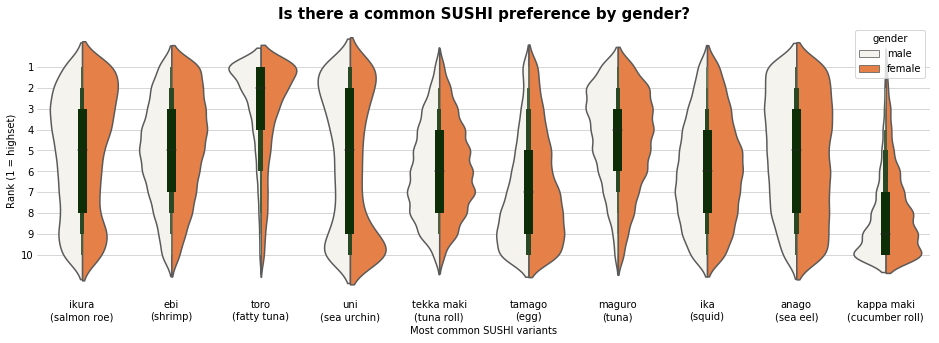

In [8]:
q3 = a_ranked.join(user_details, on='user_code').copy()
q3['rank']=q3['rank'].astype(int)

fig2, ax2 = plt.subplots(figsize=(16, 5))
ax2.set_axisbelow(True)
sns.violinplot(x='item_name', y='rank', hue='gender',
               data=q3, palette=sushi, split=True,
               scale='count', inner=None, ax=ax2)
sns.boxenplot(x='item_name', y='rank',
              data=q3, color='#0a3500',width=0.1, ax=ax2)

ax2.set_title('Is there a common SUSHI preference by gender?',
              fontsize=15, fontweight='black')
ax2.set_xlabel('Most common SUSHI variants')
ax2.set_ylabel('Rank (1 = highset)')
ax2.set_yticks(range(1,10+1))
ax2.tick_params(length=0)
ax2.grid(True, axis='y', linewidth=.5)
ax2 = sns.despine(left=True,bottom=True)

plt.ylim(reversed(plt.ylim()))

fig2.show();

#### 4. Can we get just the top ranked for each of the age group?
Since we found out that genders have no significant difference in preferences, this approach will be useful if the target is the general market. Every demographic will have their supposed top choice when they look at the menu.
<br><br>
Here, a table should be enough. The results align with our gender groups plot, with *toro* or fatty tuna sushi,  still king.

In [9]:
q4 = b_prefs.join(user_details.set_index('user_id'), on='user_id').copy()
q4['preferrence'] += 1
top_sku1 = (q4.groupby(['age_group', 'preferrence'])[['item_name']]
              .agg(pd.Series.mode)
              .query('preferrence == 5')
              .reset_index())
top_sku1

,age_group,preferrence,item_name
0,15-19,5,maguro
1,20-29,5,ebi
2,30-39,5,toro
3,40-49,5,toro
4,50-59,5,toro
5,60+,5,maguro


Added simple barcharts per age group on what preceeded the top ranked items above.

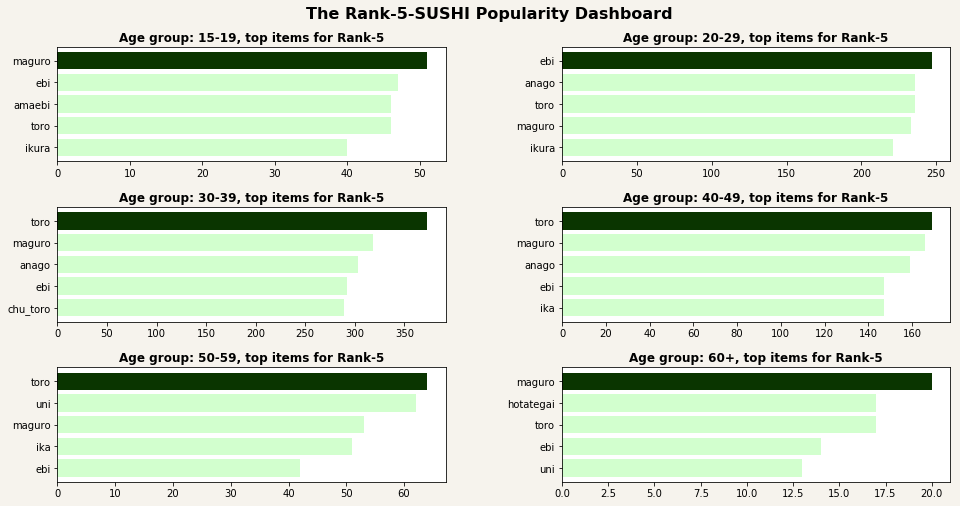

In [10]:
g4 = (q4.query('preferrence == 5')
        .copy()
        .groupby(['item_name', 'age_group'])[['preferrence']]
        .agg('count').reset_index())

fig4, ax4 = plt.subplots(3, 2, figsize=(16, 8), facecolor='#f6f3ed',
                         gridspec_kw=dict(wspace=0.3, hspace=0.4))
fig4.suptitle('The Rank-5-SUSHI Popularity Dashboard', fontsize=16,
              fontweight='black', y=.95)
c_list = ['#d2ffce', '#d2ffce', '#d2ffce', '#d2ffce', '#0a3500']
for ax, ag in zip(ax4.flat, age_group):
    ax.barh(g4[g4['age_group'] == ag].sort_values(by='preferrence')[-5:]['item_name'],
            g4[g4['age_group'] == ag]['preferrence'].sort_values()[-5:],
            color=c_list)
    ax.set_title(f'Age group: {ag}, top items for Rank-5', fontweight='bold')

fig4.show()

#### 5. How about for each gender-age-group combination, will this still hold?
Yes, still true, especially for the younger crowds. Segmenting it this way will reveal additional choices for more specific groups than those above.

In [11]:
q5 = b_prefs.join(user_details.set_index('user_id'), on='user_id').copy()
q5['preferrence'] += 1
top_sku2 = (q5.groupby(['age_group', 'gender', 'preferrence'])[['item_name']]
              .agg(pd.Series.mode)
              .query('preferrence == 5')
              .reset_index())
top_sku2

,age_group,gender,preferrence,item_name
0,15-19,female,5,maguro
1,15-19,male,5,toro
2,20-29,female,5,ebi
3,20-29,male,5,"[anago, maguro]"
4,30-39,female,5,toro
5,30-39,male,5,toro
6,40-49,female,5,toro
7,40-49,male,5,maguro
8,50-59,female,5,uni
9,50-59,male,5,toro


## II. Final Visualization


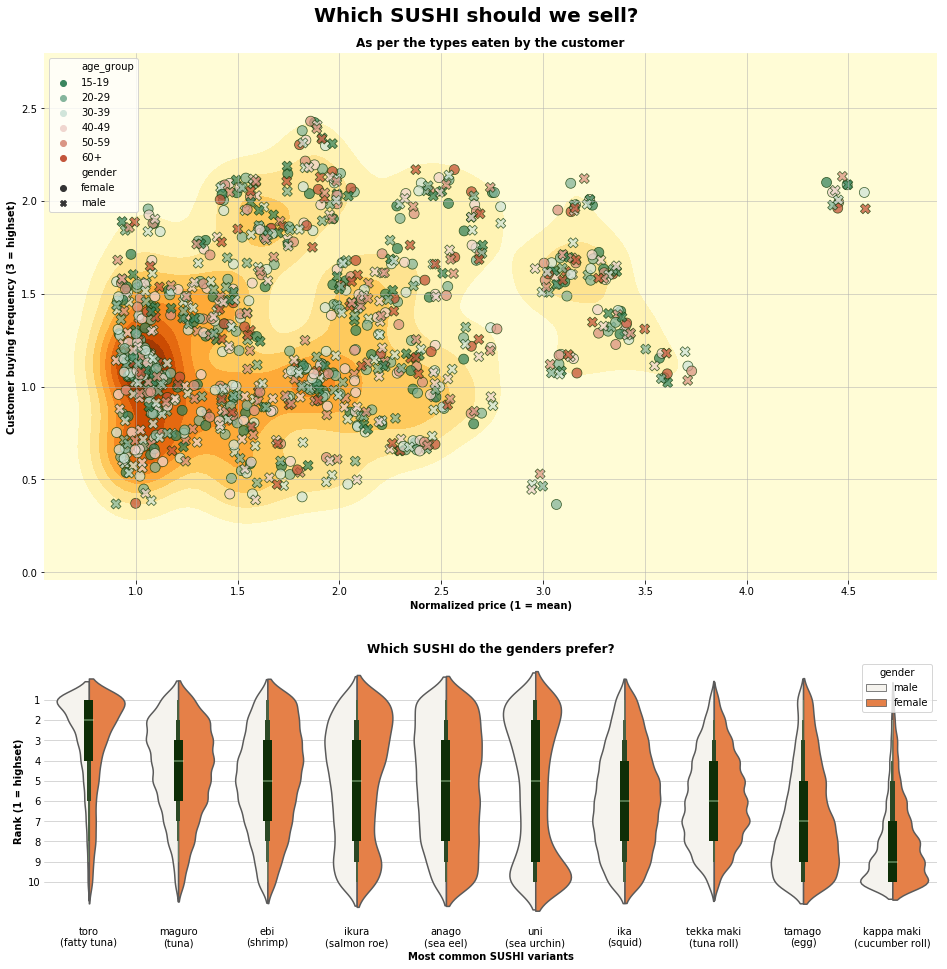

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(16,16),
                       gridspec_kw={'height_ratios': [4, 2]})

fig.suptitle('Which SUSHI should we sell?',
             fontsize=20, fontweight='black', y=.92)
#-----------------------------------------------------------------------------
sns.kdeplot(item_b_details['price_norm'], item_b_details['freq_eat'],
            cmap='YlOrBr', shade=True, bw=.15, ax=ax[0])
#-----------------------------------------------------------------------------
gf = (q4.query('preferrence == 5')
        .copy()
        .groupby(['item_name', 'gender', 'age_group'])[['preferrence']]
        .agg('count')
        .reset_index()
        .join(item_b_details.set_index('item_name'), on='item_name'))
# add x, y jitter-------------------------------------------------------------
gf['price_norm'] += (np.random.ranf(gf['price_norm'].size)-.5)/5
gf['freq_eat'] += (np.random.ranf(gf['freq_eat'].size)-.5)/5
#-----------------------------------------------------------------------------
g = sns.scatterplot(x='price_norm', y='freq_eat',  hue='age_group',
                    style='gender', data=gf, ax=ax[0], s=100, palette=cmap,
                    edgecolor='#0a3500', alpha=.75, markers=['o', 'X'])
#-----------------------------------------------------------------------------
ax[0].set_title('As per the types eaten by the customer', fontweight='bold')
ax[0].set_xlabel('Normalized price (1 = mean)', fontweight='bold')
ax[0].set_ylabel('Customer buying frequency (3 = highset)', fontweight='bold')
ax[0].grid(True, axis='both', which='both', linewidth=.5)
#-----------------------------------------------------------------------------
ax[1].set_axisbelow(True)

sns.violinplot(x='item_name', y='rank', hue='gender',
               data=q3, palette=sushi, split=True,
               order=['toro\n(fatty tuna)', 'maguro\n(tuna)', 'ebi\n(shrimp)',
                      'ikura\n(salmon roe)', 'anago\n(sea eel)',
                      'uni\n(sea urchin)', 'ika\n(squid)',
                      'tekka maki\n(tuna roll)', 'tamago\n(egg)',
                      'kappa maki\n(cucumber roll)'],
               scale='count', inner=None, ax=ax[1])

sns.boxenplot(x='item_name', y='rank',
              order=['toro\n(fatty tuna)', 'maguro\n(tuna)', 'ebi\n(shrimp)',
                      'ikura\n(salmon roe)', 'anago\n(sea eel)',
                      'uni\n(sea urchin)', 'ika\n(squid)',
                      'tekka maki\n(tuna roll)', 'tamago\n(egg)',
                      'kappa maki\n(cucumber roll)'],
              data=q3, color='#0a3500',width=0.1, ax=ax[1])

for l in ax[1].lines:
    l.set_color('#d2ffce')

ax[1].set_title('Which SUSHI do the genders prefer?', fontweight='bold')
ax[1].set_xlabel('Most common SUSHI variants', fontweight='bold')
ax[1].set_ylabel('Rank (1 = highset)', fontweight='bold')
ax[1].set_yticks(range(1,10+1))
ax[1].tick_params(length=0)
ax[1].grid(True, axis='y', which='both', linewidth=.5)
ax[1] = sns.despine(left=True,bottom=True)

plt.ylim(reversed(plt.ylim()))
# ----------------------------------------------------------------------------
fig.show();

#### Summary
Sushi, among a few other things, is an icon of Japan. I bet, however, there is not a lot of people that knows the existence of at least a hundred variants of sushi. With this many a flavor, I’m pretty sure there is a sushi for everybody. In data-science-speak, sushi is a platform for delivering flavor. It is no wonder that people from all ages, and gender spectrum prefer one form of sushi over another.
<br><br>
This visualization will, aside from set the mood, help the sushi joints to identify which among the numerous types of sushi they should offer to ensure business viability. Thie first section of the two-part visualization contains a scatter plot of customer buying frequency vs the normalized price. This should guide the users of this vis about the pricing sensitivity of their customers. This is additionally detailed with the genders and age groups to further narrow their focus strategy. For example, there is visually less of the older people buying the cheaper sushi, although to confirm this, we should run the data to get concrete numbers.
<br><br>
The next part is one I discussed earlier in EDA, but this time arranged by customer preference. This shows the 10 most served sushi and how each gender likes each type. It is clearly distinguishable here how each SKU is received by each customer group. With the two data visualizations, the audience will be well guided on which products to offer, or which customers they should target depending on the profile of their stores. 